In [1]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# '깃대종'이 언급된 뉴스 글
df = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['제목']].to_csv('D:/GEODATA/bigkinds.txt', index=False, header=False)
f = open("D:/GEODATA/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
dataset = [[y for y in x if not len(y)==1] for x in dataset]   # 2자 이상 
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자판별
dataset[:10]

[['구상',
  '구상나무',
  '나무',
  '산굴뚝나비',
  '굴뚝',
  '나비',
  '한라산',
  '한라산국립공원',
  '국립공원',
  '대표',
  '생물종'],
 ['한라산', '대표', '생물종', '구상', '구상나무', '나무', '산굴뚝나비', '굴뚝', '나비', '선정'],
 ['한라산', '대표', '생물', '구상', '구상나무ㆍ산', '나무', '굴뚝', '굴뚝나비', '나비', '선정'],
 ['한라산',
  '생태',
  '특성',
  '대표',
  '생물종',
  '구상',
  '구상나무',
  '나무',
  '산굴뚝나비',
  '굴뚝',
  '나비',
  '선정'],
 ['제주', '한라산', '대표', '생물종', '구상', '구상나무', '나무', '산굴뚝나비', '굴뚝', '나비'],
 ['한라산', '한라산국립공원', '국립공원', '대표', '생물'],
 ['장태산', '태산', '문재인', '재인', '코스', '생물', '생물친구', '친구'],
 ['강릉', '제모습', '순포습지', '습지', '순채', '복원', '성과'],
 [],
 ['계룡산', '호반새']]

In [5]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [6]:
# 모형 구축
model = Word2Vec(dataset,
                 sg=1,           # Skip-gram 적용: 중심 단어로 주변 단어를 예측
                 window=5,       # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                 min_count=1     # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

c:\users\bhyu\appdata\local\programs\python\python35\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
# 단어간 유사도
print("깃대종과 국립공원 단어간 유사도는 %.2f 입니다." % (model.wv.similarity('깃대종', '국립공원')))

깃대종과 국립공원 단어간 유사도는 0.99 입니다.


In [8]:
# 가장 유사한 단어 100개
df = pd.DataFrame(model.wv.most_similar("깃대종", topn=100), columns=['단어', '유사도'])
df.head(20)

,단어,유사도
0,국립공원,0.987217
1,생태,0.987102
2,복원,0.986794
3,식물,0.985942
4,공원,0.985193
5,환경,0.983601
6,깃대,0.983476
7,대전,0.982029
8,보호,0.981718
9,야생,0.981342


In [9]:
kw_list = ['가야산', '경주', '계룡산', '내장산', '다도해해상',
           '덕유산', '무등산', '변산반도', '북한산', '설악산',
           '소백산', '속리산', '오대산', '월악산', '월출산',
           '주왕산', '지리산', '치악산', '태백산', '태안해안',
           '한라산', '한려해상']
df = df[df['단어'].isin(kw_list)]
df

,단어,유사도
24,지리산,0.974170
38,덕유산,0.968169
46,북한산,0.964786
54,소백산,0.960748
58,속리산,0.958786
71,무등산,0.954422
75,치악산,0.952560


In [10]:
# 가장 유사한 단어 100개
df1 = pd.DataFrame(model.wv.most_similar(df.iloc[0]['단어'], topn=100), columns=['단어', df.iloc[0]['단어']])
df2 = pd.DataFrame(model.wv.most_similar(df.iloc[1]['단어'], topn=100), columns=['단어', df.iloc[1]['단어']])
df3 = pd.DataFrame(model.wv.most_similar(df.iloc[2]['단어'], topn=100), columns=['단어', df.iloc[2]['단어']])
df4 = pd.DataFrame(model.wv.most_similar(df.iloc[3]['단어'], topn=100), columns=['단어', df.iloc[3]['단어']])
df5 = pd.DataFrame(model.wv.most_similar(df.iloc[4]['단어'], topn=100), columns=['단어', df.iloc[4]['단어']])
dfs = [df.set_index(['단어']) for df in [df1, df2, df3, df4, df5]]
df5 = pd.concat(dfs, join='inner', axis=1).reset_index()
df5.head(10)

,단어,지리산,덕유산,북한산,소백산,속리산
0,국립공원,0.976821,0.972201,0.965745,0.953885,0.960207
1,환경,0.975673,0.971712,0.964319,0.945806,0.956893
2,생태,0.975573,0.970636,0.970202,0.955556,0.954869
3,깃대종,0.974170,0.968169,0.964786,0.960748,0.958786
4,녹색,0.973737,0.962124,0.957081,0.939334,0.947876
5,깃대,0.973611,0.959866,0.967121,0.948911,0.960684
6,복원,0.973336,0.970579,0.968038,0.947146,0.955041
7,자연,0.973001,0.965453,0.964464,0.942317,0.961931
8,공원,0.972526,0.967046,0.969938,0.949544,0.958512
9,식물,0.971442,0.967711,0.970117,0.951853,0.961535


In [11]:
# 단어 평균 컬럼 추가
df5['전체'] = df5.mean(numeric_only=True, axis=1)
df = df5.sort_values(by='전체', ascending=False); df = df[:30]
df.head(10)

,단어,지리산,덕유산,북한산,소백산,속리산,전체
0,국립공원,0.976821,0.972201,0.965745,0.953885,0.960207,0.965772
2,생태,0.975573,0.970636,0.970202,0.955556,0.954869,0.965367
3,깃대종,0.974170,0.968169,0.964786,0.960748,0.958786,0.965332
9,식물,0.971442,0.967711,0.970117,0.951853,0.961535,0.964532
8,공원,0.972526,0.967046,0.969938,0.949544,0.958512,0.963513
1,환경,0.975673,0.971712,0.964319,0.945806,0.956893,0.962881
6,복원,0.973336,0.970579,0.968038,0.947146,0.955041,0.962828
13,습지,0.969247,0.970107,0.966793,0.945612,0.959378,0.962227
11,발견,0.969521,0.963943,0.969421,0.949959,0.958000,0.962169
5,깃대,0.973611,0.959866,0.967121,0.948911,0.960684,0.962038


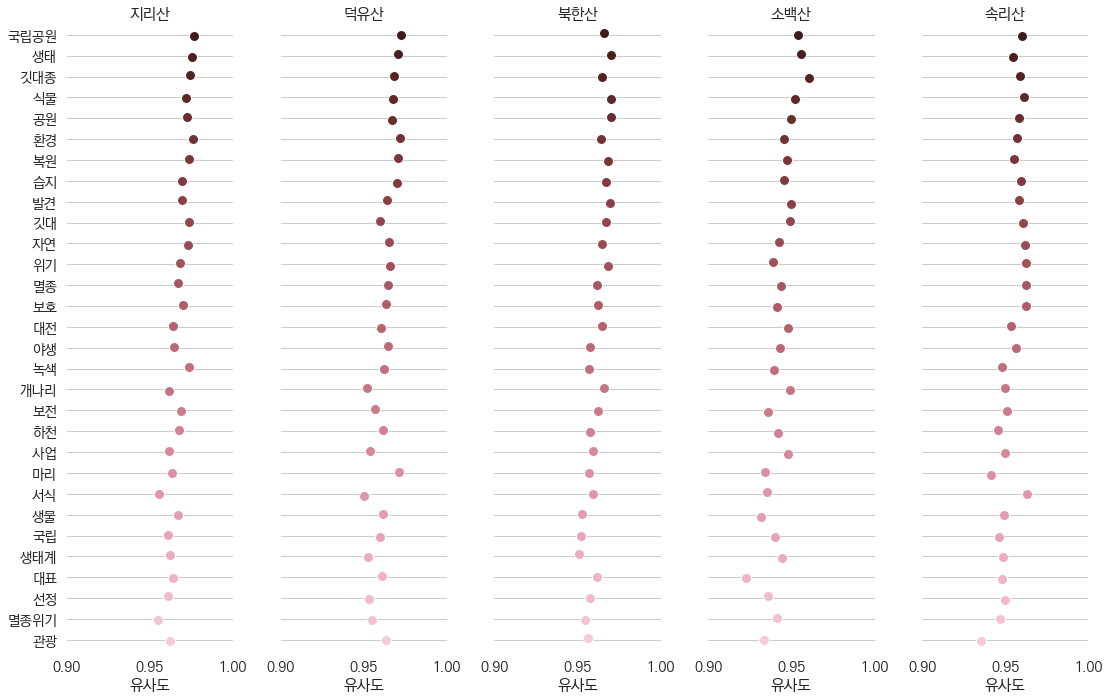

In [13]:
# 플롯 설정
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.3)
g = sns.PairGrid(df.sort_values("전체", ascending=False), x_vars=df.columns[1:6], y_vars=["단어"])
g.fig.set_size_inches(16,16)

# 스트립플롯 함수를 이용한 닷 플롯
g.map(sns.stripplot,
      size=10,
      orient="h",
      palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1,
      edgecolor="w")
g.set(xlim=(0.90, 1), xlabel="유사도", ylabel="")
titles = df.columns[1:6]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)                        # 축 제목 설정
    ax.xaxis.grid(False); ax.yaxis.grid(True) # 수평 격자 설정

sns.despine(left=True, bottom=True)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')